In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
#Load the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#Checking the shape
print("Training set", X_train.shape)
print("Test set", X_test.shape)

Training set (60000, 28, 28)
Test set (10000, 28, 28)


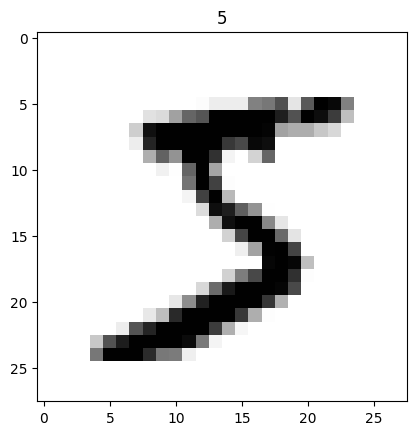

In [8]:
#Visualize the data
plt.imshow(X_train[0], cmap= plt.cm.binary)
plt.title(y_train[0])
plt.show()


In [9]:
#Reshape the channel distribution

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [10]:
#Normalize the pixel values
X_train = X_train/255
X_test = X_test/255

#One-Hot Encode
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [11]:
#Building CNN model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
#Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - accuracy: 0.9589 - loss: 0.1436 - val_accuracy: 0.9858 - val_loss: 0.0425
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 61ms/step - accuracy: 0.9755 - loss: 0.0807 - val_accuracy: 0.9883 - val_loss: 0.0344
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9808 - loss: 0.0646 - val_accuracy: 0.9911 - val_loss: 0.0287
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9837 - loss: 0.0522 - val_accuracy: 0.9915 - val_loss: 0.0281
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.9873 - loss: 0.0424 - val_accuracy: 0.9913 - val_loss: 0.0259


In [17]:
#Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(f"Test Accuracy: {score[1] * 100:.2f}%")

Test loss: 0.025917034596204758
Test accuracy: 0.9912999868392944
Test Accuracy: 99.13%


In [18]:
#Save the model
model.save('mnist_cnn_model.h5')